In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pickle

In [117]:
def acquire(x):
    dicts = {}
    files = []
    file_path = "dati/trained_model/"
    data = ["initial_conf", "conf_tot", "iou_tot", "steps_tot"]
    for i in range(len(data)):
        files.append(file_path + "0" + str(x) + "_" + str(data[i]) + ".pkl")
    for i,file in enumerate(files):
        with open(file, 'rb') as dict:
            loaded_dict = pickle.load(dict)
            dicts[data[i]] = loaded_dict
    return dicts
def remove_none(dict):
    sub_dict = dict["initial_conf"]
    for key in sub_dict:
        if sub_dict[key] is None:
            sub_dict[key] = 0
    return sub_dict
def plot_dict(dict):
    correct_dict = remove_none(dict)
    keys = range(len(list(correct_dict.keys())))
    values = list(correct_dict.values())

    plt.bar(keys, values)
    plt.xlabel('Keys')
    plt.ylabel('Values')
    plt.title('Plot of Dictionary Values')
    plt.show()
def sum_norm(dict):
    sum_values = []
    for index in range(len(next(iter(dict.values())))):
        index_sum = 0

        for key, value_list in dict.items():
            index_sum += value_list[index]
    
        sum_values.append(index_sum)
    min_value = min(sum_values)
    max_value = max(sum_values)

    normalized_values = [(x - min_value) / (max_value - min_value) for x in sum_values]
    return normalized_values
def plot(dict, cls):
    step = []
    norm_dict = sum_norm(dict)
    for i in range(0, 101, 5):
        step.append(i)
    plt.plot(step, norm_dict, marker='o', linestyle='-')
    plt.xlabel('Pixel perturbation')
    plt.ylabel('Confidence increase')
    plt.title("Confidence " + cls)
    plt.grid(True)
    plt.show()


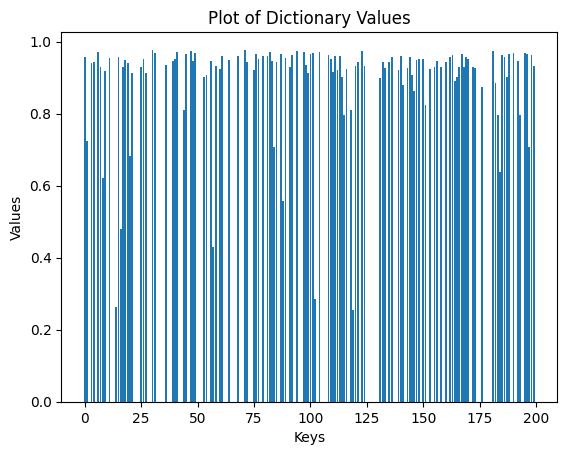

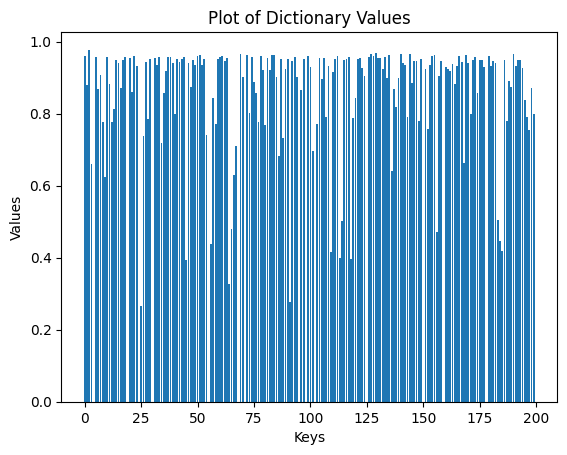

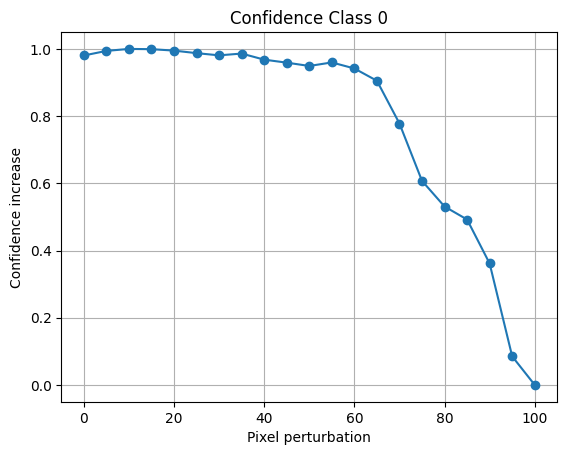

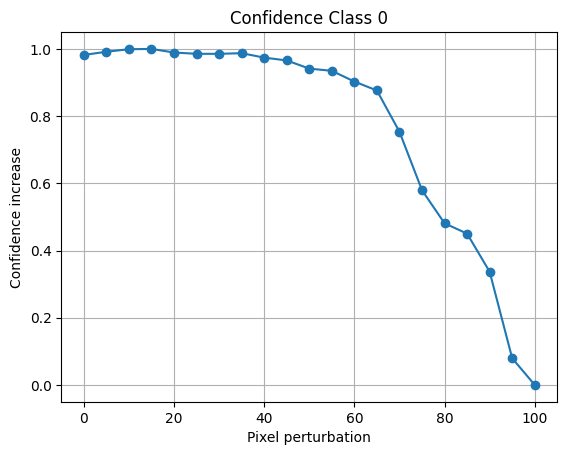

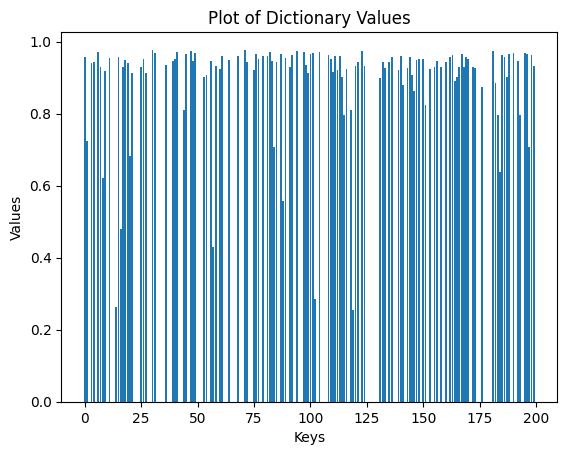

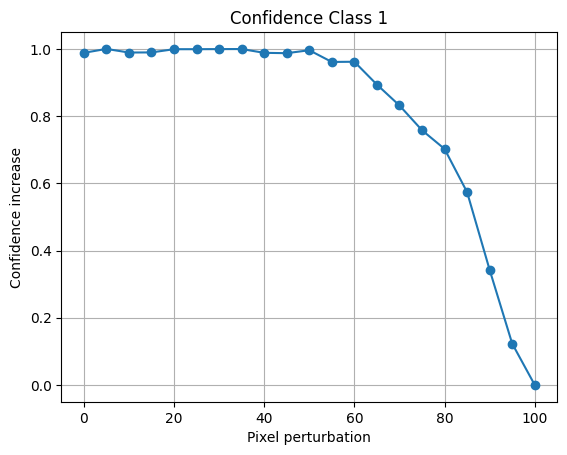

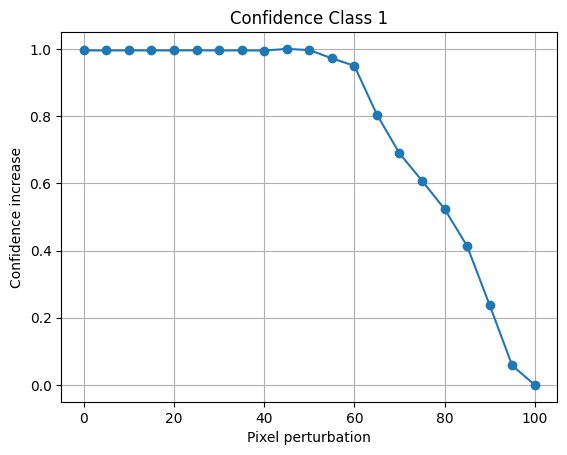

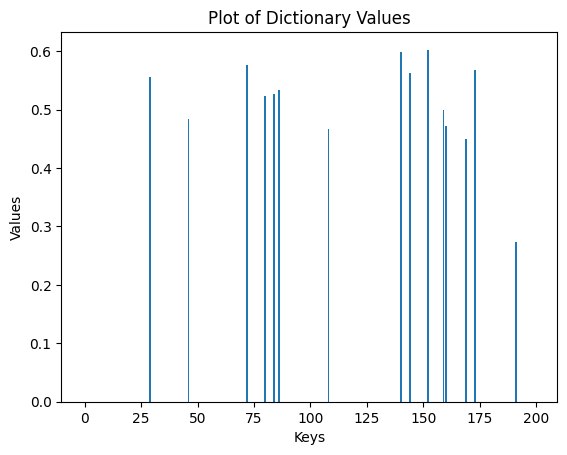

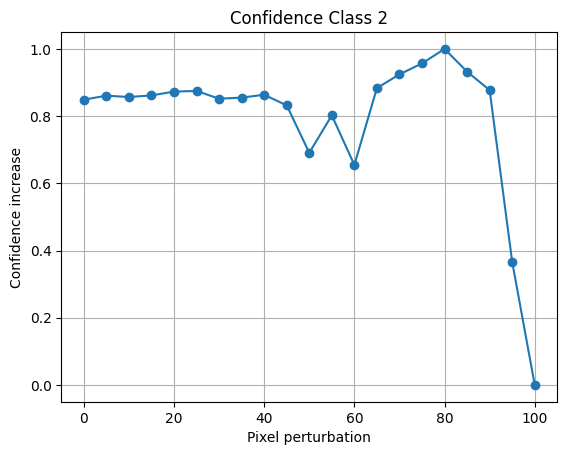

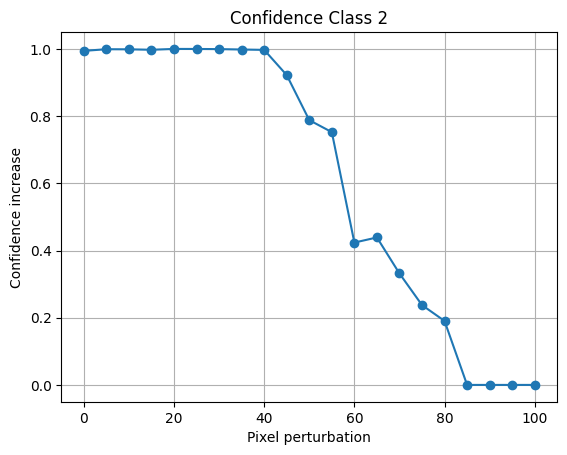

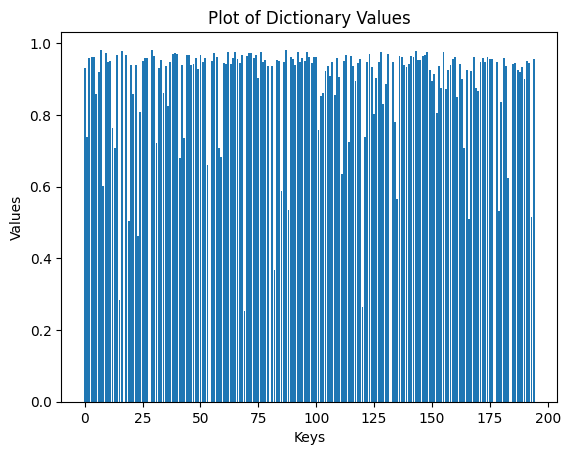

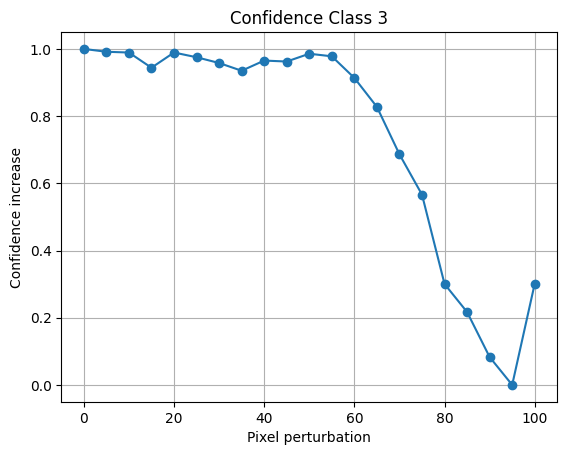

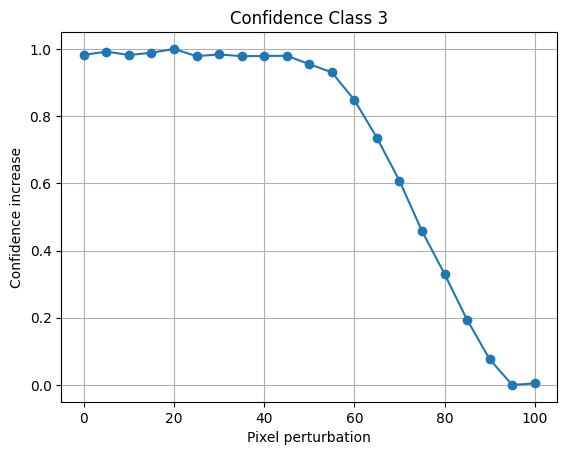

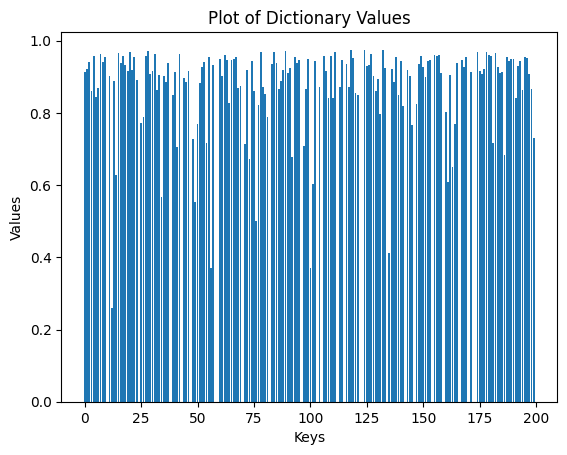

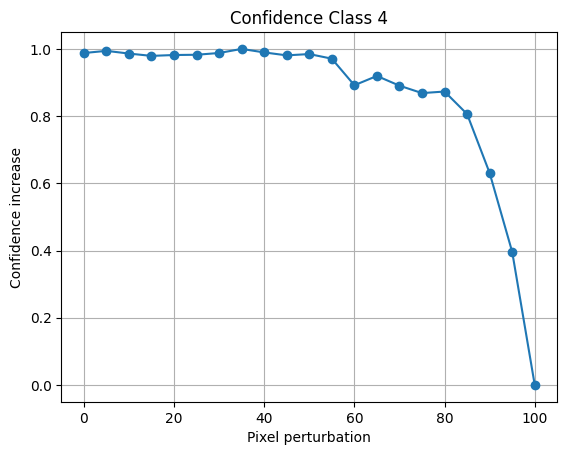

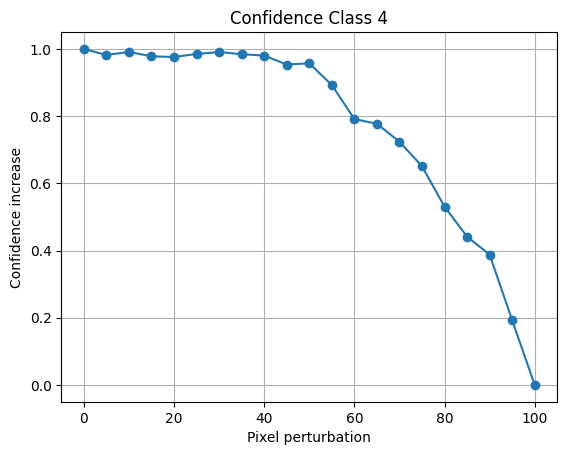

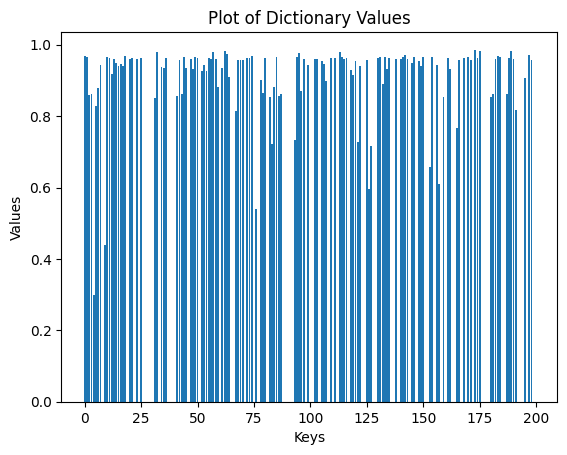

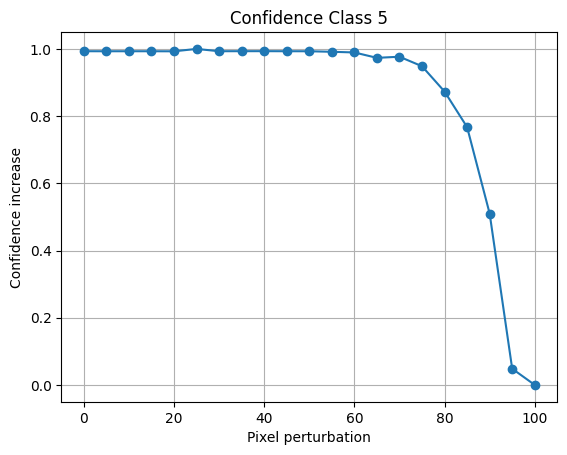

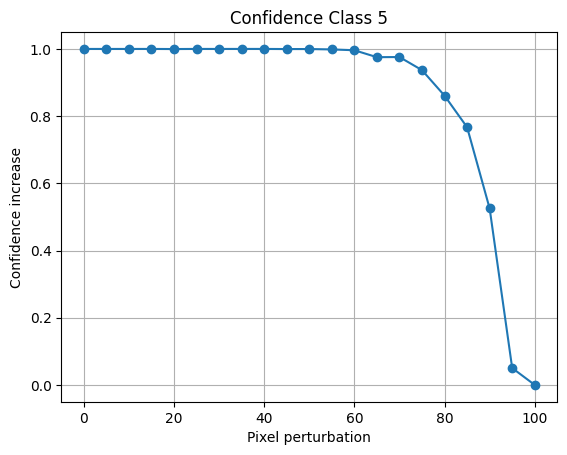

In [122]:
for i in range(6):
    cls = acquire(i)
    plot_dict(cls)
    plot(cls["conf_tot"], "Class " + str(i))
    plot(cls["iou_tot"], "Class " + str(i))

In [118]:
def norm(lists, step,name):
    fixed_length = len(step)
    if(name == "conf"):
        adjusted_list = [sublist + [-1] * (fixed_length - len(sublist)) for sublist in lists]
    else:
        adjusted_list = [sublist + [0] * (fixed_length - len(sublist)) for sublist in lists]
    num_positions = len(adjusted_list[0])
    
    sums_at_positions = [0] * num_positions
    for sublist in adjusted_list:
        for i, value in enumerate(sublist):
            sums_at_positions[i] += value
    normalized_arr = preprocessing.normalize([sums_at_positions], norm='l2')
    normalized_list = normalized_arr.tolist()
    normalized_values = normalized_list[0]
    return normalized_values
def plots(conf,iou,step, name):
    normalized_conf = norm(conf, step, "conf")
    plt.plot(step, normalized_conf, marker='o', linestyle='-')
    print("Area Over the Perturbation Curve",np.sum(normalized_conf) / len(step))

    plt.xlabel('Pixel perturbation')
    plt.ylabel('Confidence increase')
    plt.title("Confidence "+ name)
    plt.grid(True)
    plt.show()
    normalized_IoU = norm(iou, step, "iou")
    plt.plot(step, normalized_IoU, marker='o', linestyle='-')
    print("Area Over the Perturbation Curve",np.sum(normalized_IoU) / len(step))

    plt.xlabel('Pixel perturbation')
    plt.ylabel('IoU')
    plt.title("IoU " + name)
    plt.grid(True)
    plt.show()

In [119]:
step = []
for i in range(0, 101, 5):
    step.append(i)

In [120]:
conf_tot_all_images = np.load('res/00_conf.npy', allow_pickle=True)
IoU_tot_all_images = np.load('res/00_Iou.npy', allow_pickle=True)
steps_all_images = np.load('res/00_steps.npy', allow_pickle=True)
Conf_class_0 = norm(conf_tot_all_images, step, "conf")
IoU_class_0  = norm(IoU_tot_all_images, step, "iou")

Area Over the Perturbation Curve -0.21157235022067614


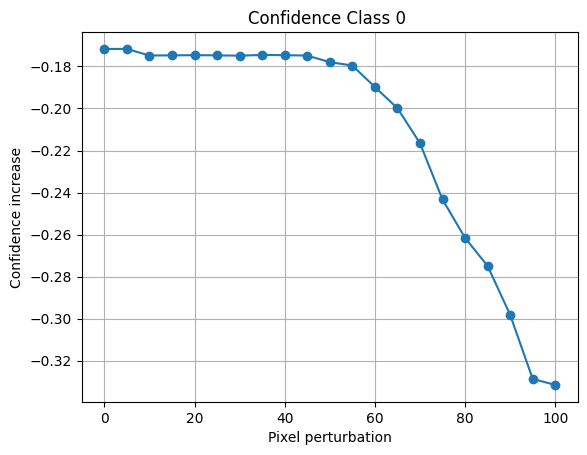

Area Over the Perturbation Curve 0.20034083898414212


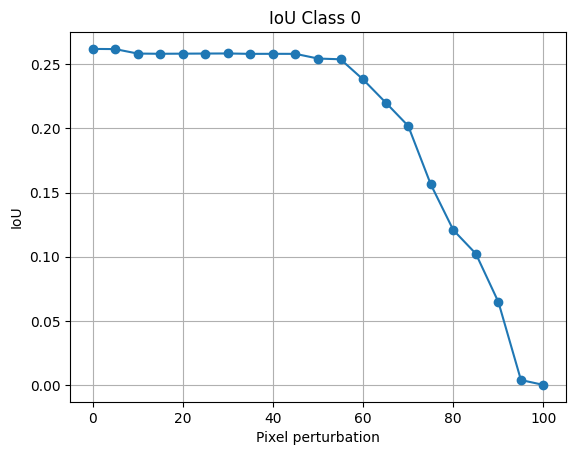

In [121]:
plots(conf_tot_all_images, IoU_tot_all_images, step, "Class 0 ")

Area Over the Perturbation Curve -0.21007234591395058


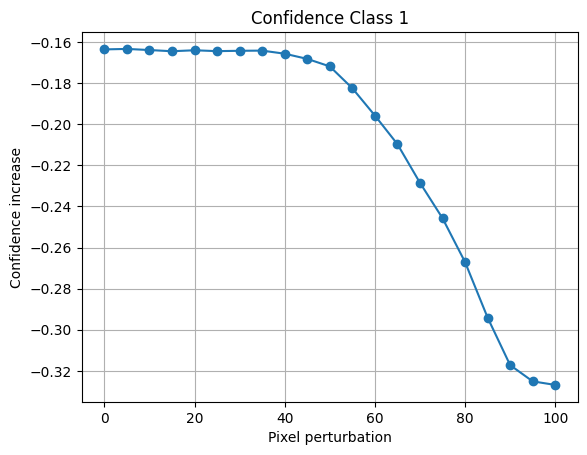

Area Over the Perturbation Curve 0.19554668284186366


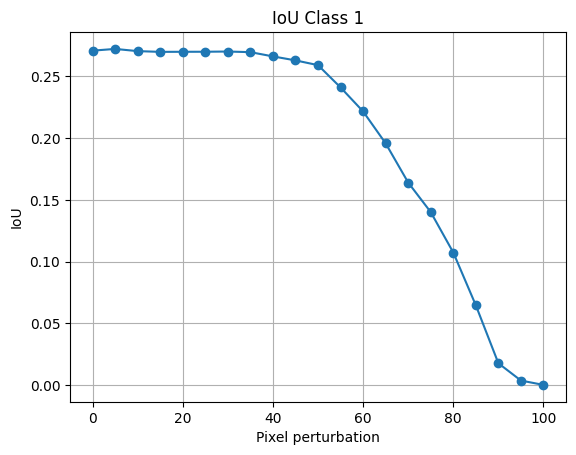

In [122]:
conf_tot_all_images = np.load('res/01_conf.npy', allow_pickle=True)
IoU_tot_all_images = np.load('res/01_Iou.npy', allow_pickle=True)
steps_all_images = np.load('res/01_steps.npy', allow_pickle=True)
plots(conf_tot_all_images, IoU_tot_all_images, step, "Class 1")
Conf_class_1 = norm(conf_tot_all_images, step, "conf")
IoU_class_1  = norm(IoU_tot_all_images, step, "iou")

Area Over the Perturbation Curve -0.212692391121329


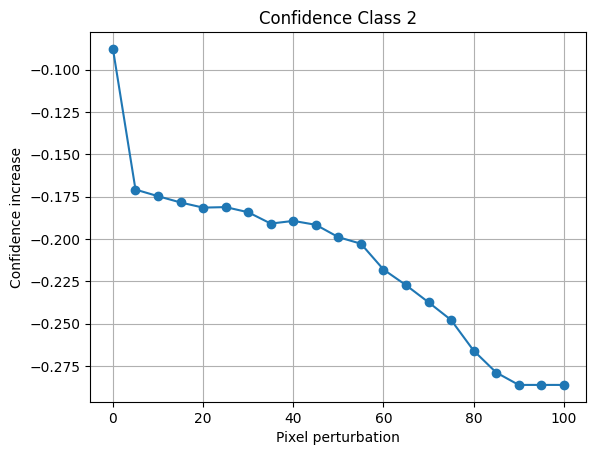

Area Over the Perturbation Curve 0.1871329211059617


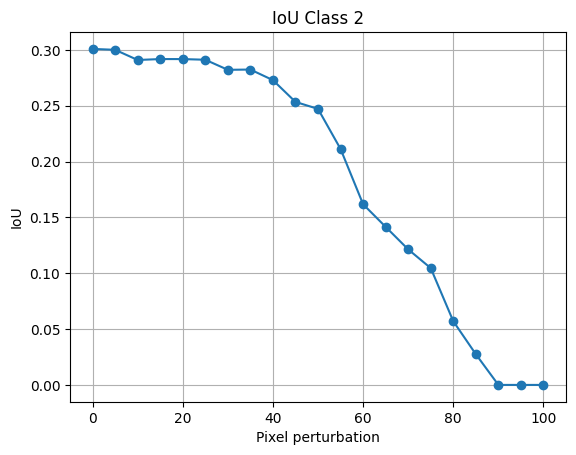

In [123]:
conf_tot_all_images = np.load('res/02_conf.npy', allow_pickle=True)
IoU_tot_all_images = np.load('res/02_Iou.npy', allow_pickle=True)
steps_all_images = np.load('res/02_steps.npy', allow_pickle=True)
plots(conf_tot_all_images, IoU_tot_all_images, step, "Class 2")
Conf_class_2 = norm(conf_tot_all_images, step, "conf")
IoU_class_2  = norm(IoU_tot_all_images, step, "iou")

Area Over the Perturbation Curve -0.21507294748587963


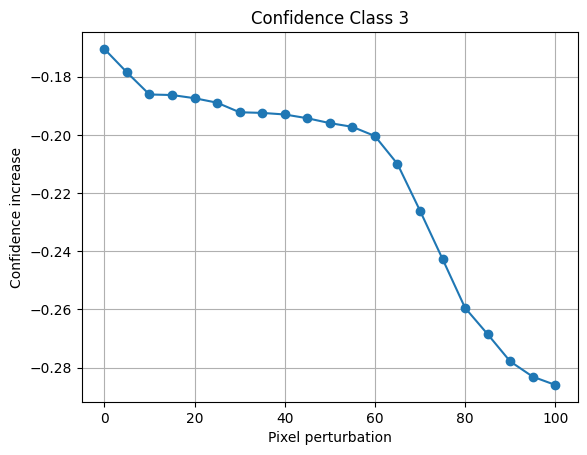

Area Over the Perturbation Curve 0.19421913491649287


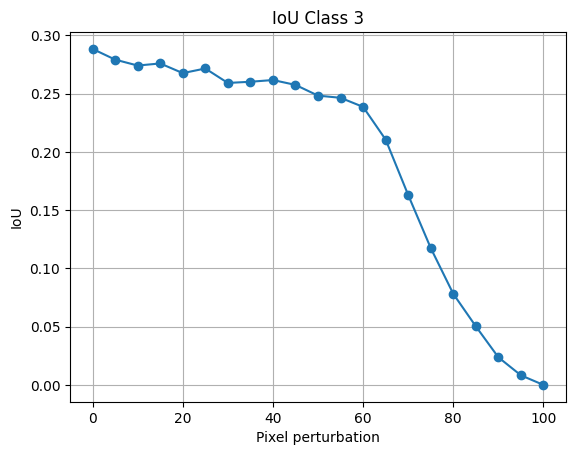

In [124]:
conf_tot_all_images = np.load('res/03_conf.npy', allow_pickle=True)
IoU_tot_all_images = np.load('res/03_Iou.npy', allow_pickle=True)
steps_all_images = np.load('res/03_steps.npy', allow_pickle=True)
plots(conf_tot_all_images, IoU_tot_all_images, step, "Class 3")
Conf_class_3 = norm(conf_tot_all_images, step, "conf")
IoU_class_3  = norm(IoU_tot_all_images, step, "iou")

Area Over the Perturbation Curve -0.19830830355529613


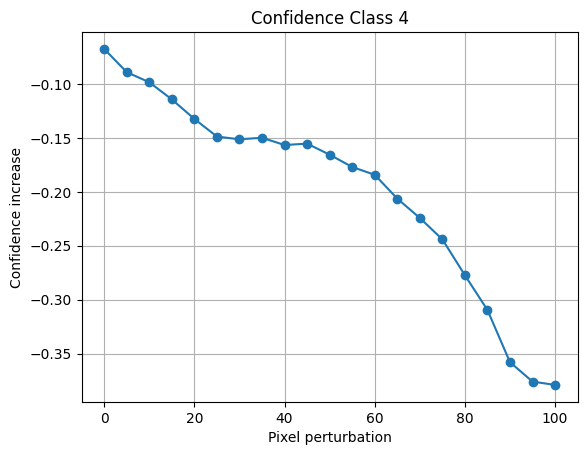

Area Over the Perturbation Curve 0.19767567198317837


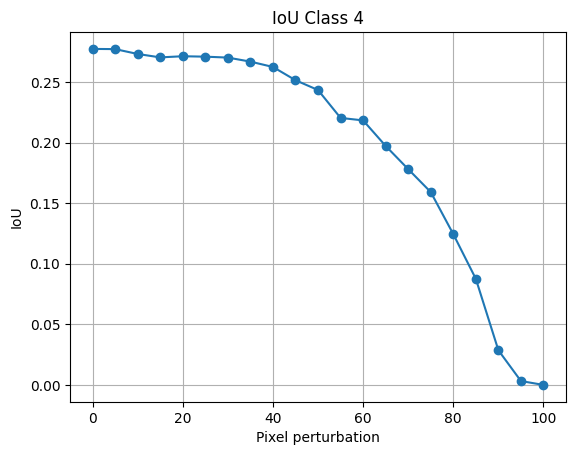

In [125]:
conf_tot_all_images = np.load('res/04_conf.npy', allow_pickle=True)
IoU_tot_all_images = np.load('res/04_Iou.npy', allow_pickle=True)
steps_all_images = np.load('res/04_steps.npy', allow_pickle=True)
plots(conf_tot_all_images, IoU_tot_all_images, step, "Class 4")
Conf_class_4 = norm(conf_tot_all_images, step, "conf")
IoU_class_4  = norm(IoU_tot_all_images, step, "iou")

Area Over the Perturbation Curve -0.21699092081160737


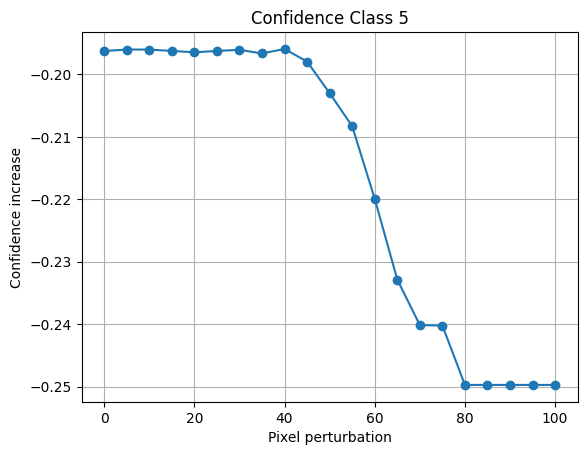

Area Over the Perturbation Curve 0.17903459528212057


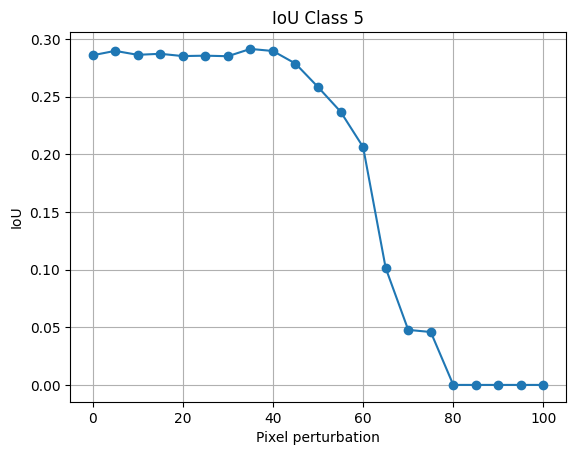

In [126]:
conf_tot_all_images = np.load('res/05_conf.npy', allow_pickle=True)
IoU_tot_all_images = np.load('res/05_Iou.npy', allow_pickle=True)
steps_all_images = np.load('res/05_steps.npy', allow_pickle=True)
plots(conf_tot_all_images, IoU_tot_all_images, step, "Class 5")
Conf_class_5 = norm(conf_tot_all_images, step, "conf")
IoU_class_5  = norm(IoU_tot_all_images, step, "iou")

In [127]:
conf_tot = [Conf_class_0,Conf_class_1,Conf_class_2,Conf_class_3,Conf_class_4,Conf_class_5]
IoU_tot = [IoU_class_0,IoU_class_1,IoU_class_2,IoU_class_3,IoU_class_4,IoU_class_5]

Area Over the Perturbation Curve -0.21210996702729515


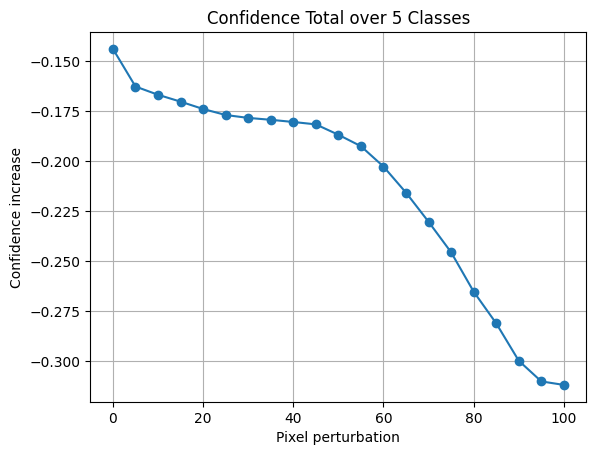

Area Over the Perturbation Curve 0.19344092969330276


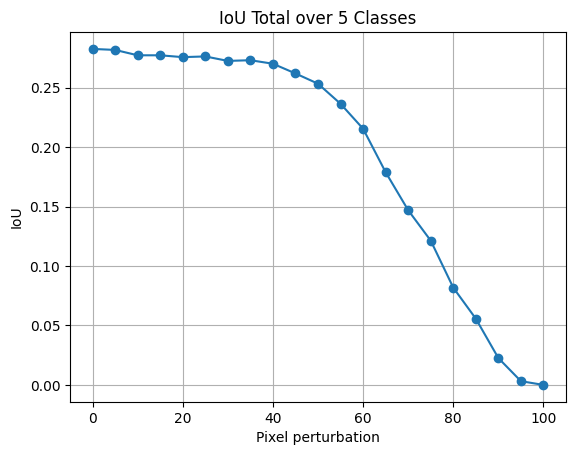

In [128]:
plots(conf_tot, IoU_tot, step, "Total over 5 Classes")
